In [1]:
import  numpy as np
from matplotlib import pyplot as plt
import pandas as pd

moves = np.array([[   0.        ,  -30.        ],
       [  -0.        ,   30.        ],
       [ 152.42916513,  253.0109294 ],
       [ 207.66137296,   76.99530985],
       [ -73.33977752, -725.55321137],
       [ -91.82711862,   50.51517398],
       [  30.30196728,  474.6920921 ],
       [  -0.        ,   30.        ],
       [   0.        ,  -30.        ],
       [ -30.30196728, -474.6920921 ],
       [  91.82711862,  -80.51517398],
       [   0.        ,   30.        ],
       [  73.33977752,  755.55321137],
       [  -0.        ,  -30.        ],
       [-207.66137296,  -76.99530985],
       [-152.42916513, -253.0109294 ]])

flags = np.array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True])


moves = pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"])#,dtype=[("EL",float),("CE",float),("UV_image",float)])

slits_coord_obs_det = np.array([
[1744.5149,	709.2633],
[2074.3496,	567.48754],
[1959.6651,	1885.5387],
[1813.3748,	1795.4066],
[1856.6138,	932.35271],
[1856.4786,	931.65825],
[1813.6749,	1794.3482],
[1959.5905,	1885.554],
[2071.5012,	576.32861],
[1744.3718,	708.52823]])

mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]

pair_diff_valid = pair_diff[[0,2,3,4],:]
mean = np.abs(pair_diff_valid).mean(axis=0)
var  = np.abs(pair_diff_valid).var(axis=0)
print(mean,var)

[0.16325   0.6258075] [0.00694489 0.14412678]


In [2]:
sigma = mean/np.sqrt(2/np.pi)
var_from_sigma = sigma**2*(1-2/np.pi)
print(sigma, var_from_sigma, var)

[0.20460353 0.78433339] [0.01521204 0.22354383] [0.00694489 0.14412678]


In [3]:
moves_sign  = np.sign(moves.loc[2:mid+1,moves.columns != 'UV_image'])

pair_diff_signed = pair_diff * moves_sign



In [4]:
CE_comp = moves.loc[moves.UV_image == 0].index + 1
EL = moves.drop(index = CE_comp).EL
moves_EL_fwd = EL[1:mid+1]  # skip first to GC
moves_EL_bwd = EL[mid+1:-1] # skip last back to gc

print(moves_EL_fwd)
print(moves_EL_bwd)
moves_EL_opposite = np.sign(moves_EL_fwd.values)*np.sign(moves_EL_bwd.values[::-1]) == -1
print(moves_EL_opposite)


2    152.429165
3    207.661373
4    -73.339778
5    -91.827119
6     30.301967
Name: EL, dtype: float64
7      -0.000000
9     -30.301967
10     91.827119
12     73.339778
14   -207.661373
Name: EL, dtype: float64
[ True False  True False False]


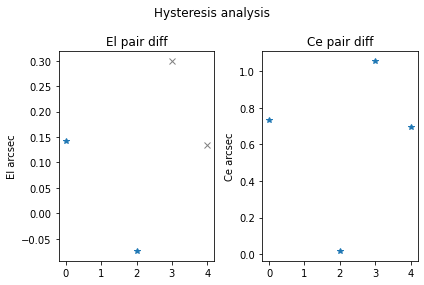

In [6]:
#valid = np.array([0,1,2,3,4]) 
valid = np.array([0,2,3,4]) 

fig, (ax0,ax1) = plt.subplots(1,2)
#index = np.arange(pair_diff.shape[0], dtype='int')
ax0.plot(valid[moves_EL_opposite[valid]], pair_diff_signed.EL.values[valid][moves_EL_opposite[valid]],'*')
ax0.plot(valid[~moves_EL_opposite[valid]], pair_diff_signed.EL.values[valid][~moves_EL_opposite[valid]],'x',color='0.5')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
ax1.plot(valid, pair_diff_signed.CE.values[valid],'*')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()
